Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija.

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [283]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [284]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given,
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None :
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`).

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [285]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [286]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost klasifikacijskog modela: 1.0


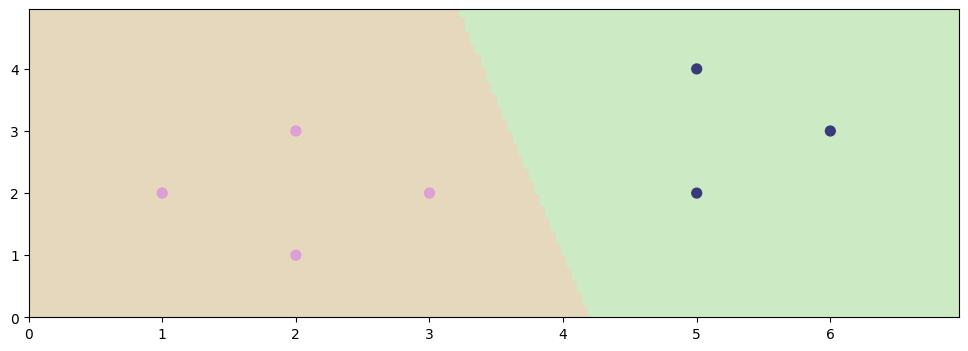

In [287]:
model1a = RidgeClassifier(alpha = 0).fit(seven_X, seven_y)

h1a = lambda x: model1a.predict(x) >= 0.5

w1a = []
w1a.extend(model1a.intercept_)

for i in range(0, len(model1a.coef_)):
    w1a.extend(model1a.coef_[i])

plot_2d_clf_problem(seven_X, seven_y, h1a)

tocnoct1a = accuracy_score(model1a.predict(seven_X), seven_y)
print("Točnost klasifikacijskog modela: " + str(tocnoct1a))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Točnost klasifikacijskog modela: 1.0


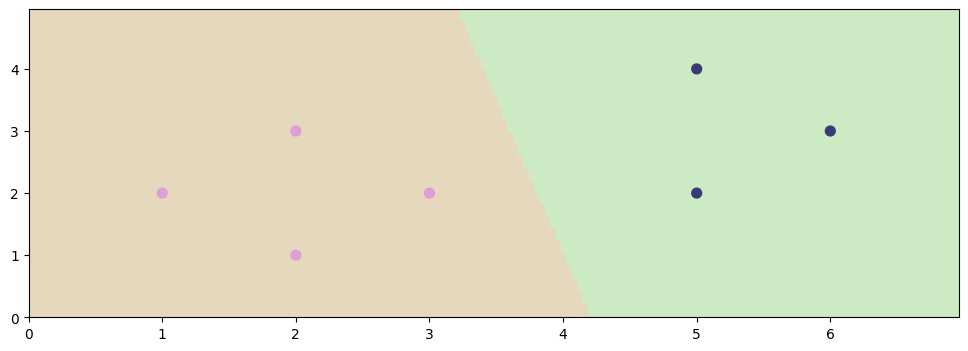

In [288]:
model1aLinReg = LinearRegression().fit(seven_X, seven_y)

h1aLinReg = lambda x: model1aLinReg.predict(x) >= 0.5

w1aLinReg = [model1aLinReg.intercept_]
w1aLinReg.extend(model1aLinReg.coef_)

predicted = []
for i in h1aLinReg(seven_X):
    if i == True:
        predicted.append(1)
    else: predicted.append(0)

plot_2d_clf_problem(seven_X, seven_y, h1aLinReg)

tocnoct1aLinReg = accuracy_score(predicted, seven_y)
print("Točnost klasifikacijskog modela: " + str(tocnoct1aLinReg))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [289]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost klasifikacijskog modela: 0.875


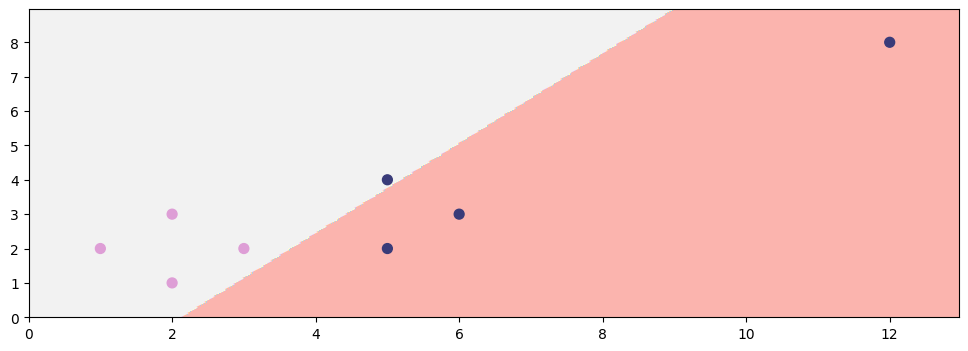

In [290]:
model1b = RidgeClassifier(alpha = 0).fit(outlier_X, outlier_y)

h1b = lambda x: model1b.predict(x)

plot_2d_clf_problem(outlier_X, outlier_y, h1b)

tocnoct1b = accuracy_score(model1b.predict(outlier_X), outlier_y)
print("Točnost klasifikacijskog modela: " + str(tocnoct1b))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [291]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost klasifikacijskog modela: 0.875


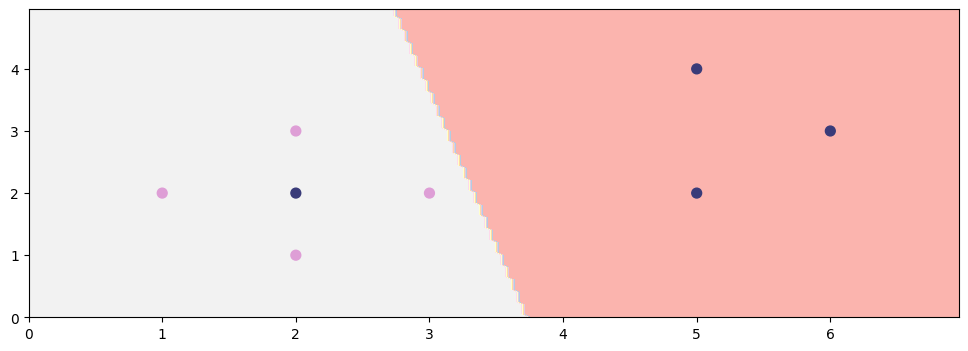

In [292]:
model1c = RidgeClassifier(alpha = 0).fit(unsep_X, unsep_y)

h1c = lambda x: model1c.predict(x)
plot_2d_clf_problem(unsep_X, unsep_y, h1c)

tocnoct1c = accuracy_score(model1c.predict(unsep_X), unsep_y)
print("Točnost klasifikacijskog modela: " + str(tocnoct1c))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

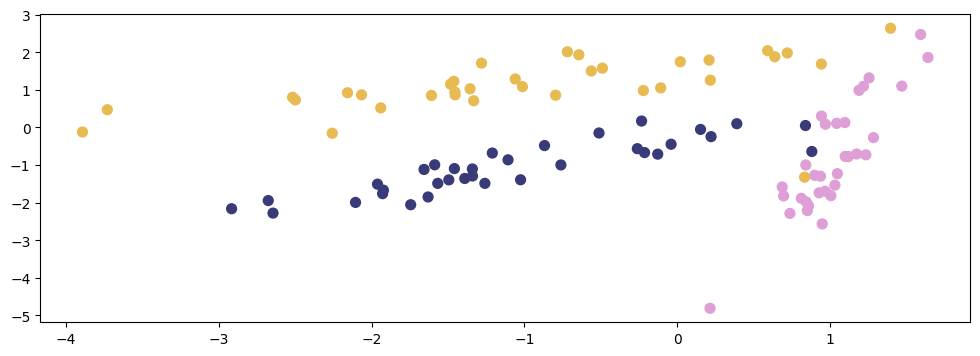

In [293]:
from sklearn.datasets import make_classification

X2, y2 = make_classification(n_samples=100, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)
plot_2d_clf_problem(X2,y2)


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

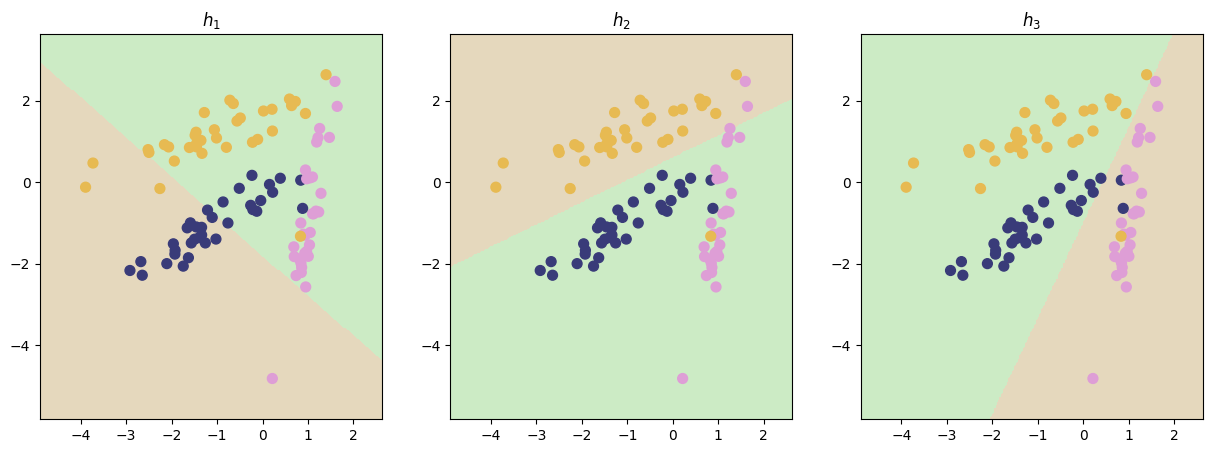

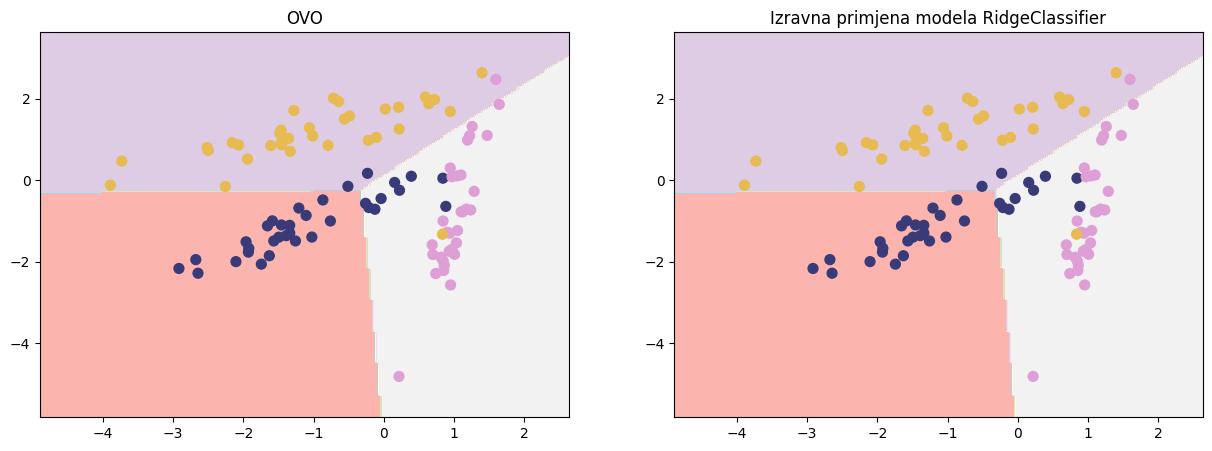

In [294]:
y21 = []
y22 = []
y23 = []

for i in y2:
  if i == 0:
    y21.append(1)
    y22.append(0)
    y23.append(0)
  if i == 1:
    y21.append(0)
    y22.append(1)
    y23.append(0)
  if i == 2:
    y21.append(0)
    y22.append(0)
    y23.append(1)

model21 = LinearRegression().fit(X2, y21)
model22 = LinearRegression().fit(X2, y22)
model23 = LinearRegression().fit(X2, y23)
h21 = lambda x: model21.predict(x) >= 0.5
h22 = lambda x: model22.predict(x) >= 0.5
h23 = lambda x: model23.predict(x) >= 0.5

plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('$h_1$')
plot_2d_clf_problem(X2,y2,h21)
plt.subplot(1,3,2)
plt.title('$h_2$')
plot_2d_clf_problem(X2,y2,h22)
plt.subplot(1,3,3)
plt.title('$h_3$')
plot_2d_clf_problem(X2,y2,h23)


hargmax = lambda x: np.argmax([model21.predict(x.reshape(1,-1)), model22.predict(x.reshape(1,-1)), model23.predict(x.reshape(1,-1))])
plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('OVO')
plot_2d_clf_problem(X2, y2, hargmax)


ridg2 = RidgeClassifier(alpha = 0).fit(X2, y2)
hRidg2 = lambda x: ridg2.predict(x)
plt.subplot(1,2,2)
plt.title('Izravna primjena modela RidgeClassifier')
plot_2d_clf_problem(X2, y2, hRidg2)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

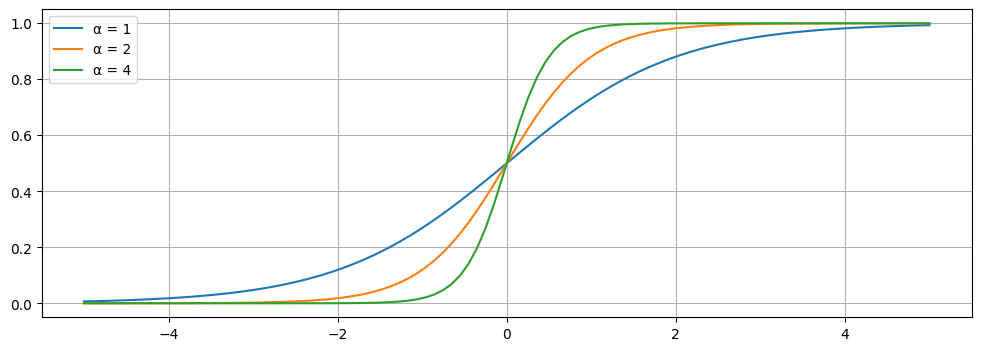

In [295]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
alpha = [1, 2, 4]
for a in alpha:
    y = sigmoid(a * x)
    plt.plot(x, y, label=f'α = {a}')

plt.grid()
plt.legend()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela?
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b)

Implementirajte funkciju

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)`

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [314]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    Phi = PolynomialFeatures(1).fit_transform(x.reshape(1,-1))
    return sigmoid(Phi.dot(w))

def cross_entropy_error(X, y, w):
  N = len(X)
  error = 0.0
  for i in range(0,N):
    h = lr_h(X[i],w)
    error += y[i] * np.log(h) + (1 - y[i]) * np.log(1 - h)
  error = -error
  return error / N

def lr_train(X, y, eta = 0.01, max_iter = 2000, alpha = 0, epsilon = 0.0001, trace= False):
    w = np.zeros(shape(X)[1] + 1)
    N = len(X)
    w_trace = [];
    err_init = 0

    for i in range(max_iter):
        grad0 = 0
        grad = np.zeros(shape(X)[1])

        for j in range(N):
            h = lr_h(X[j], w)
            grad0 += h - y[j]
            grad += (h - y[j])*X[j]

        if abs(err_init - cross_entropy_error(X, y, w)) < epsilon:
          break
        else:
          err_init += cross_entropy_error(X, y, w)

        w[0] -= eta * grad0
        w[1:] = w[1:] * (1-eta* alpha) - eta* grad

        w_trace.extend(w)

    if trace:
        return w, w_trace
    else:
      return w



### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [297]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])


Pogreška unakrsne entropije: 0.07751718252492557


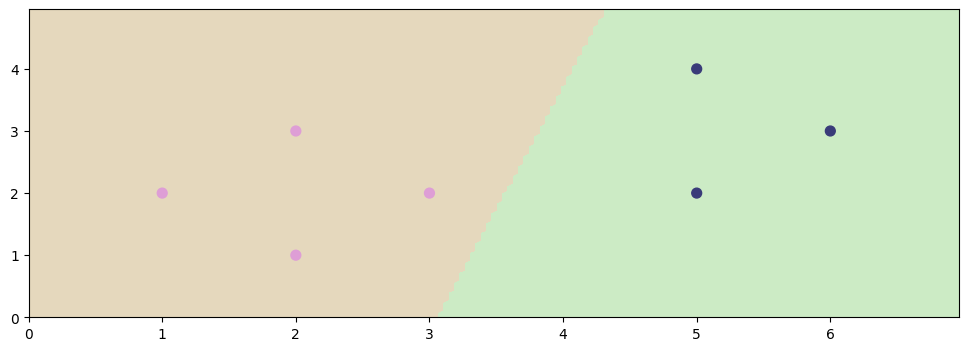

In [318]:
w3c = lr_train(seven_X, seven_y)

print("Pogreška unakrsne entropije: " + str(double(cross_entropy_error(seven_X, seven_y, w3c))))

h3c = lambda x: lr_h(x, w3c) > 0.5
plot_2d_clf_problem(seven_X,seven_y,h3c)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [299]:
from sklearn.metrics import zero_one_loss

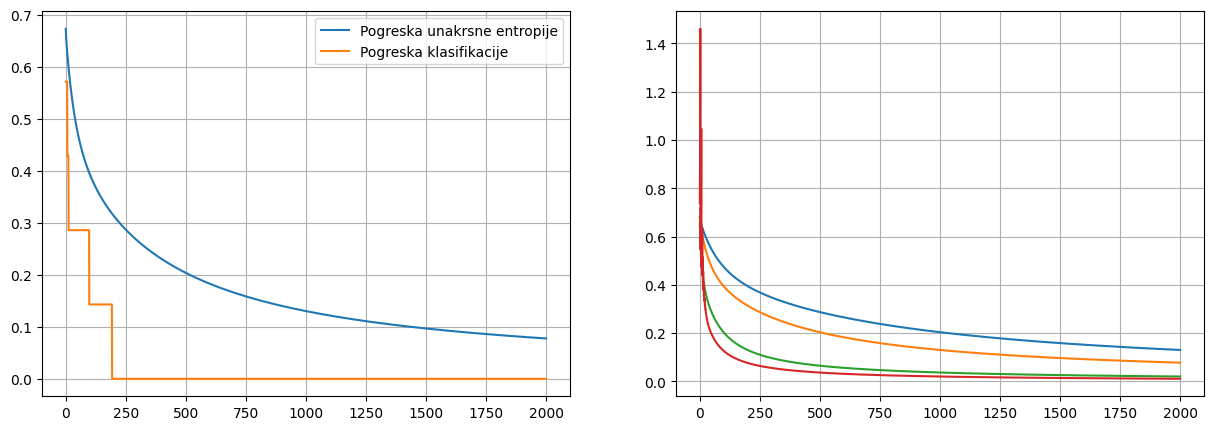

In [300]:
[w3d, w3d_trace] = lr_train(seven_X, seven_y, trace=True)

Phi = PolynomialFeatures(1).fit_transform(seven_X)
h3d = lambda x: x > 0.5

cross_error = []
klas_error = []

for i in range(0,len(w3d_trace),3):
  cross_error.append(cross_entropy_error(seven_X, seven_y, w3d_trace[i:i+3]))
  klas_error.append(zero_one_loss(seven_y, h3d(sigmoid(Phi.dot(w3d_trace[i:i+3])))))

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1,2,1)
plt.grid()
plt.plot(cross_error)
plt.plot(klas_error)
plt.legend(['Pogreska unakrsne entropije', 'Pogreska klasifikacije']);

eta = [0.005,0.01,0.05,0.1]
error = []
for i in eta:
    err = []
    [w3d, w3d_trace] = lr_train(seven_X, seven_y, i, trace=True)
    for j in range(0, len(w3d_trace), 3):
        err.append(cross_entropy_error(seven_X, seven_y, w3d_trace[j:j+3]))
    error.append(err)

plt.subplot(1,2,2)
plt.grid()
for i in range(0, len(eta)):
    plt.plot(error[i], label = '$\eta$ = ' + str(i))



**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

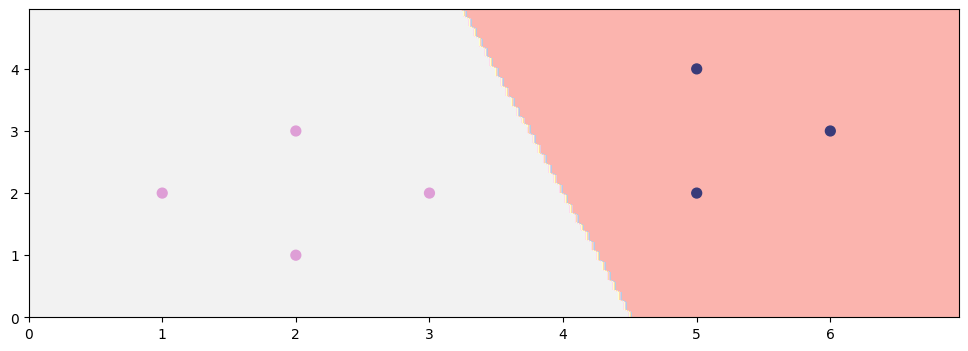

In [301]:
from sklearn.linear_model import LogisticRegression

model3e = LogisticRegression().fit(seven_X, seven_y)
h3e = lambda x: model3e.predict(x)
plot_2d_clf_problem(seven_X,seven_y,h3e)


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [302]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

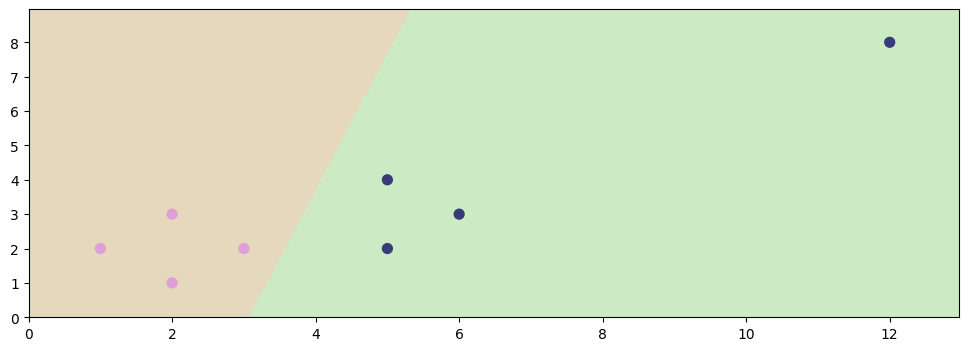

In [303]:
w4a = lr_train(outlier_X, outlier_y)
h4a = lambda x: lr_h(x, w4a) > 0.5

plot_2d_clf_problem(outlier_X,outlier_y,h4a)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Text(0.5, 1.0, 'Vrijednosti težina w0, w1, w2')

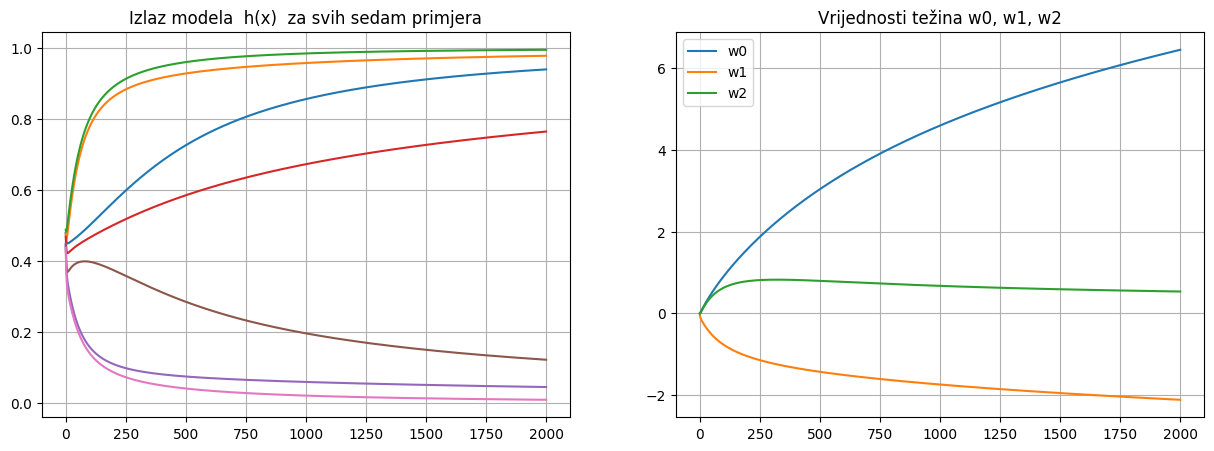

In [304]:
[w4b, w4b_trace] = lr_train(seven_X, seven_y, trace=True)

hSkup = []
for i in range(0,len(seven_X)):
  h = []
  for j in range(0,len(w4b_trace),3):
    h.append(lr_h(seven_X[i], w4b_trace[j:j+3]))
  hSkup.append(h)

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1,2,1)
plt.grid()
for i in range(0,len(hSkup)):
  plt.plot(hSkup[i], label = '$x^{%d}$ = ' % i + str(seven_X[i]))
plt.title("Izlaz modela  h(x)  za svih sedam primjera")


w04b = []
w14b = []
w24b = []

for i in range(0,len(w4b_trace),3):
  w04b.append(w4b_trace[i])
  w14b.append(w4b_trace[i+1])
  w24b.append(w4b_trace[i+2])

plt.subplot(1,2,2)
plt.grid()
plt.plot(w04b)
plt.plot(w14b)
plt.plot(w24b)
plt.legend(["w0", "w1", "w2"])
plt.title("Vrijednosti težina w0, w1, w2")

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [305]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Text(0.5, 1.0, 'Vrijednosti težina w0, w1, w2')

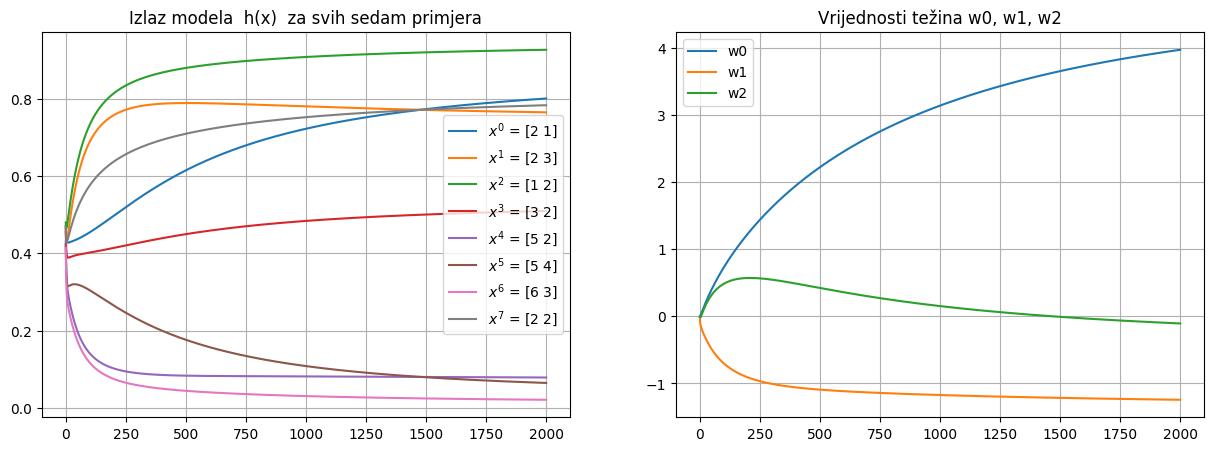

In [306]:
[w4b, w4b_trace] = lr_train(unsep_X, unsep_y, trace=True)

hSkup = []
for i in range(0,len(unsep_X)):
  h = []
  for j in range(0,len(w4b_trace),3):
    h.append(lr_h(unsep_X[i], w4b_trace[j:j+3]))
  hSkup.append(h)

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1,2,1)
plt.grid()
for i in range(0,len(hSkup)):
  plt.plot(hSkup[i], label = '$x^{%d}$ = ' % i + str(unsep_X[i]))
plt.legend()
plt.title("Izlaz modela  h(x)  za svih sedam primjera")


w04b = []
w14b = []
w24b = []

for i in range(0,len(w4b_trace),3):
  w04b.append(w4b_trace[i])
  w14b.append(w4b_trace[i+1])
  w24b.append(w4b_trace[i+2])

plt.subplot(1,2,2)
plt.grid()
plt.plot(w04b)
plt.plot(w14b)
plt.plot(w24b)
plt.legend(["w0", "w1", "w2"])
plt.title("Vrijednosti težina w0, w1, w2")

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [307]:
from numpy.linalg import norm

Text(0.5, 1.0, 'L2-normu vektora w')

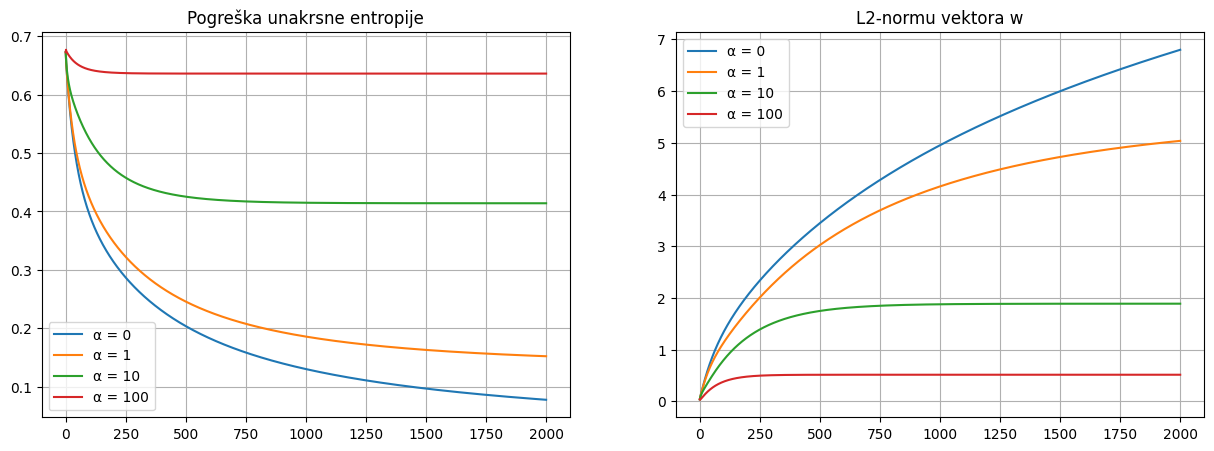

In [308]:
alpha = [0,1,10,100]

all_cross = []
all_L2 = []

for a in alpha:
  [w5, w5_trace] = lr_train(seven_X, seven_y, alpha=a, trace=True)
  cross_error5 = []
  L2norm = []

  for i in range(0,len(w3d_trace),3):
    cross_error5.append(cross_entropy_error(seven_X, seven_y, w5_trace[i:i+3]))
    L2norm.append(norm(w5_trace[i:i+3]))

  all_cross.append(cross_error5)
  all_L2.append(L2norm)

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1,2,1)
plt.grid()
for i in range(0,len(all_cross)):
  plt.plot(all_cross[i], label = 'α = ' + str(alpha[i]))
plt.legend()
plt.title("Pogreška unakrsne entropije")

plt.subplot(1,2,2)
plt.grid()
for i in range(0,len(all_L2)):
  plt.plot(all_L2[i], label = 'α = ' + str(alpha[i]))
plt.legend()
plt.title("L2-normu vektora w")

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

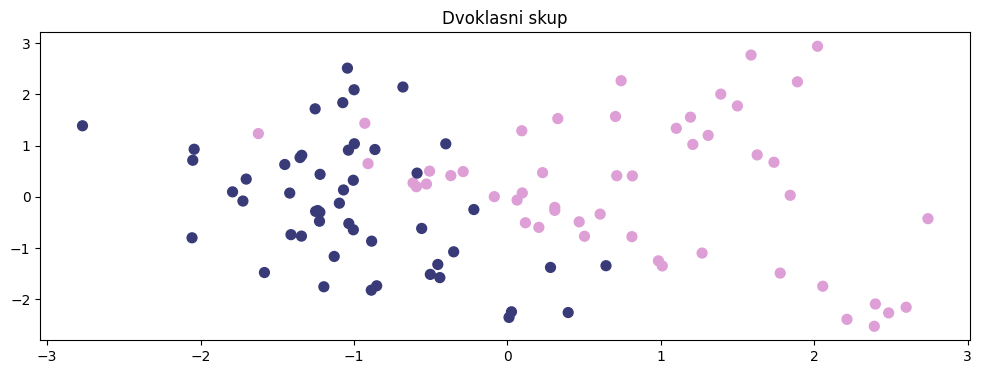

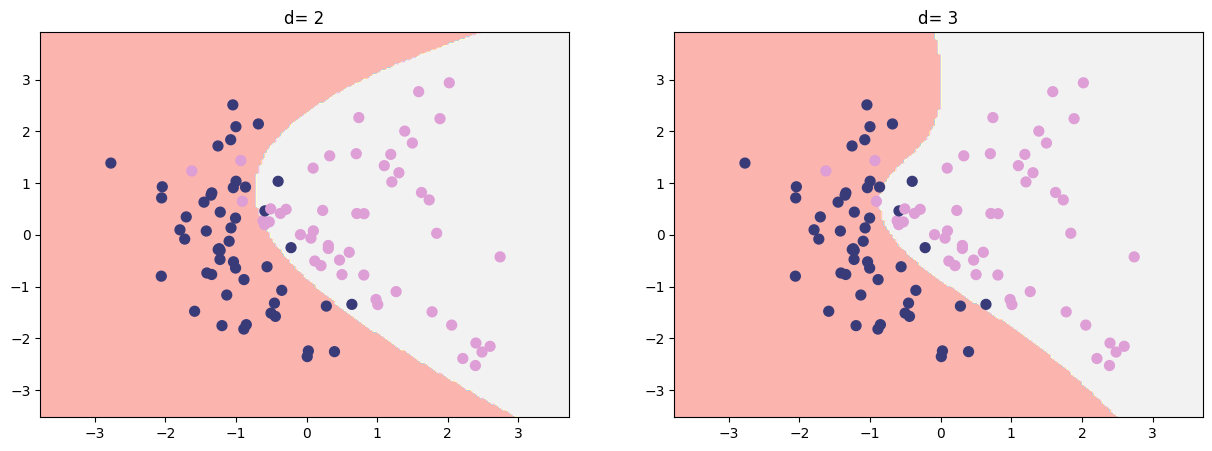

In [311]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

[X6, y6] = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

plot_2d_clf_problem(X6, y6)
plt.title('Dvoklasni skup')

d = [2,3]
plt.subplots(1, 2, figsize=(15, 5))
for i in d:
  plt.subplot(1,2,i - 1)
  poly = PolynomialFeatures(i)
  Phi = poly.fit_transform(X6)
  model = LogisticRegression().fit(Phi, y6)

  plot_2d_clf_problem(X6, y6, lambda x : model.predict(poly.transform(x)))
  plt.title('d= ' + str(i))




**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?